In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
features_titanic = pd.read_csv("C:\\Users\\danie\\OneDrive\\Área de Trabalho\\Python BRAIN\\Repotório github\\Teste\\Desafios\\Titanic\\data\\train.csv")

In [178]:
# import seaborn as sns

# sns.heatmap(features_titanic.corr(), cmap="OrRdYl")
# plt.show()

In [179]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_head, test_head in split.split(features_titanic, features_titanic[["Survived", "Pclass", "Sex"]]):
    solid_train_way = features_titanic.loc[train_head]
    solid_test_way =  features_titanic.loc[test_head]

<Axes: >

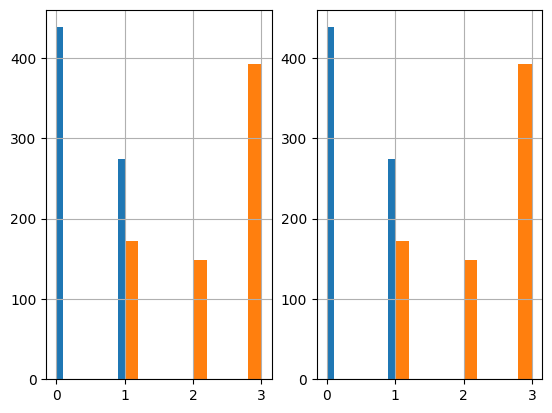

In [180]:
plt.subplot(1,2,1)
solid_train_way['Survived'].hist()
solid_train_way['Pclass'].hist()

plt.subplot(1,2,2)
solid_train_way['Survived'].hist()
solid_train_way['Pclass'].hist()


In [181]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputing(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [182]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        coding = OneHotEncoder()
        
        vector = coding.fit_transform(X[['Embarked']]).toarray()
        
        tags_columns = ["C", "S", "Q", "N"]
        
        for i in range(len(vector.T)):
            X[tags_columns[i]] = vector.T[i]
        
        vector = coding.fit_transform(X[['Sex']]).toarray()
        
        tags_columns = ["Female", "Male"]
        
        for i in range(len(vector.T)):
            X[tags_columns[i]] = vector.T[i]
        
        return X


In [183]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [184]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("ageimputer", AgeImputing()),
("featureencoder", FeatureEncoder()),
("featuredropper", FeatureDropper())])

In [185]:
solid_train_way = pipe.fit_transform(solid_train_way)

<Axes: >

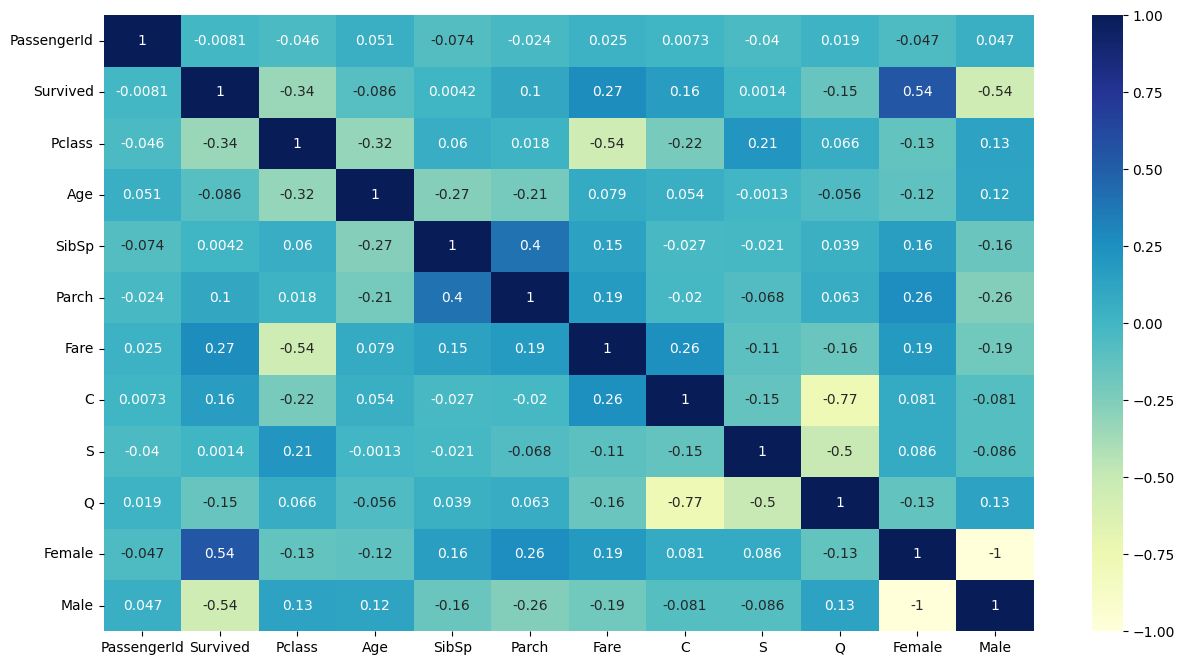

In [186]:
plt.figure(figsize=(15,8))
sns.heatmap(solid_train_way.corr(), annot=True, cmap="YlGnBu")

In [187]:
# plt.figure(figsize=(15,8))
# sns.heatmap(solid_train_way.corr(), annot=True, cmap="YlGnBu")

In [188]:
from sklearn.preprocessing import StandardScaler

X = solid_train_way.drop(['Survived'], axis=1)
y = solid_train_way['Survived']

dimensioner = StandardScaler()
X_things = dimensioner.fit_transform(X)
y_things = y.to_numpy()

In [189]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV 

# classifier = RandomForestClassifier()
# param_grid = [
#     {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
# ]

# searcher = GridSearchCV(classifier, param_grid, cv=3, scoring="accuracy", return_train_score=True)
# searcher.fit(X_things, y_things)
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

classifier = SVC()

param_grid = [
    {'C': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]}, {'kernel': ['poly', 'linear', 'rbf', 'sigmoid']}, {'degree': [2,3,4,5]}, {'gamma': ['auto', 'scale']}, {'coef0': [0.0, 0.5, 1.0, 1.5, 2.0]}
    ]

searcher = GridSearchCV(classifier, param_grid, cv=3, scoring="accuracy", return_train_score=True)
searcher = searcher.fit(X_things, y_things)


In [190]:
classifier_end = searcher.best_estimator_

In [191]:
classifier_end

SVC(C=2.0)

In [192]:
solid_test_way = pipe.fit_transform(solid_test_way)

In [193]:
X_test = solid_test_way.drop(['Survived'], axis=1)
y_test = solid_test_way['Survived']

dimensioner = StandardScaler()
X_things_test = dimensioner.fit_transform(X_test)
y_things_test = y_test.to_numpy()

In [194]:
classifier_end.score(X_things_test, y_things_test)

0.8435754189944135

In [195]:
data_end = pipe.fit_transform(features_titanic)

In [196]:
data_end

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [197]:
X_end = data_end.drop(['Survived'], axis=1)
y_end = data_end['Survived']

dimensioner = StandardScaler()
X_end_data = dimensioner.fit_transform(X_end)
y_end_data = y_end.to_numpy()

In [198]:
# prod_classifier = RandomForestClassifier()
# param_grid = [
#     {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
# ]

# searcher = GridSearchCV(prod_classifier, param_grid, cv=3, scoring="accuracy", return_train_score=True)
# searcher.fit(X_end_data, y_end_data)

prod_classifier = SVC()

param_grid = [
    {'C': [0.5, 1.0, 1.5, 2.0, 2.5]}, {'kernel': ['poly', 'linear', 'rbf', 'sigmoid']}, {'degree': [2,3,4,5]}, {'gamma': ['auto', 'scale']}, {'coef0': [0.0, 0.5, 1.0]}
    ]

searcher = GridSearchCV(prod_classifier, param_grid, cv=3, scoring="accuracy", return_train_score=True)
searcher = searcher.fit(X_things, y_things)


In [199]:
prod_end_classifier = searcher.best_estimator_

In [200]:
features_titanic_test = pd.read_csv("C:\\Users\\danie\\OneDrive\\Área de Trabalho\\Python BRAIN\\Repotório github\\Teste\\Desafios\\Titanic\\data\\test.csv")

In [201]:
end_test_things = pipe.fit_transform(features_titanic_test)

In [202]:
X_end_test = end_test_things
X_end_test = X_end_test.fillna(method="ffill")

dimensioner = StandardScaler()
X_things_end_test = dimensioner.fit_transform(X_end_test)

C:\Users\danie\AppData\Local\Temp\ipykernel_12664\1007639576.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_end_test = X_end_test.fillna(method="ffill")


In [203]:
predictions = prod_end_classifier.predict(X_things_end_test)

In [204]:
end_df = pd.DataFrame(features_titanic_test['PassengerId'])
end_df['Survived'] = predictions
end_df.to_csv("C:\\Users\\danie\\OneDrive\\Área de Trabalho\\Python BRAIN\\Repotório github\\Teste\\Desafios\\Titanic\\data\\predictions.csv", index=False)

In [205]:
end_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
